### **1. Distribuzioni di probabilità**
Genera 1000 valori casuali da una distribuzione gamma con parametro di forma pari a 1.
Suggerimento: il parametro di forma viene passato come primo argomento quando si "congela" la distribuzione.

Traccia l’istogramma del campione e sovrapponi la PDF della distribuzione.

Stima il parametro di forma dal campione usando il metodo fit.

Extra:
Le distribuzioni hanno molti metodi utili. Esplorali usando il completamento automatico con il tasto TAB.

Traccia la funzione di distribuzione cumulativa (CDF).

Calcola la varianza.

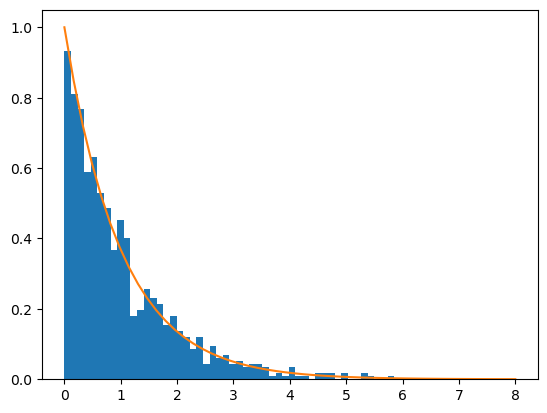

Il parametro di forma stimato con il metodo fit e' 0.9782773074585736


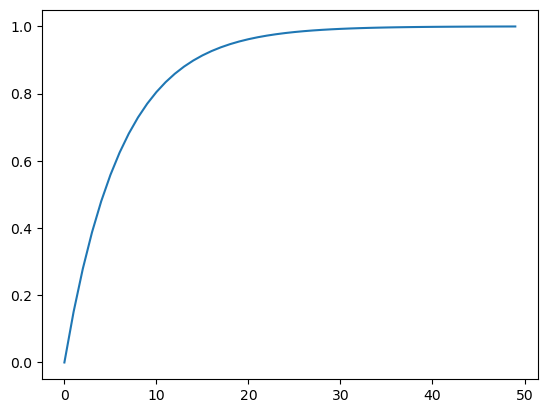

La varianza e' 1.0


In [22]:
import scipy as sp
import matplotlib.pyplot as plt
import numpy as np

dist = sp.stats.gamma(a = 1)

sample = dist.rvs(size=1000)

plt.hist(sample, bins=50, density=True)
line = np.linspace(0, 8)
plt.plot(line, dist.pdf(line), label="PDF")
plt.show()

a = sp.stats.gamma.fit(sample)
print("Il parametro di forma stimato con il metodo fit e' {}".format(a[0]))

plt.plot(dist.cdf(line))    #la CDF e' la funzione di ripartizione
plt.show()

print("La varianza e' {}".format(dist.var()))

### **2. Fitta i dati**
Prova a fittare i dati sottostante con le migliori curve, calcola il MAE e l'RMSE

MAE e RMSE della temperatura minima: 2.3410097359027167, 2.6972767170482133
MAE e RMSE della temperatura massima: 0.7720553214066515, 0.8479022664866838


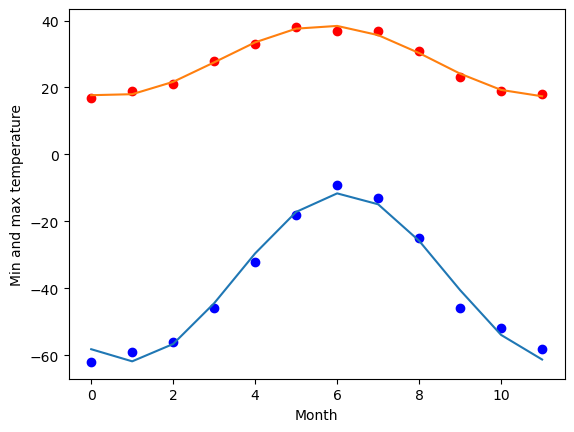

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

temp_max = np.array([17, 19, 21, 28, 33, 38, 37, 37, 31, 23, 19, 18])
temp_min = np.array([-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58])

months = np.arange(12)

def lineare(x, a, b):
    return a * x + b

def quadratica(x, a, b, c):
    return a * x**2 + b * x + c

def sinusoidale(x, a, b, c, d):
    return a * np.sin((b**2) * x + c) + d

params, _ = sp.optimize.curve_fit(sinusoidale, months, temp_min)
a, b, c, d = params
temp_min_pred = sinusoidale(months, a, b, c, d)

temp_min_mae = np.mean(np.abs(temp_min - temp_min_pred))
temp_min_rmse = np.sqrt(np.mean((temp_min - temp_min_pred)**2))

print("MAE e RMSE della temperatura minima: {}, {}".format(temp_min_mae, temp_min_rmse))

params, _ = sp.optimize.curve_fit(sinusoidale, months, temp_max)
a, b, c, d = params
temp_max_pred = sinusoidale(months, a, b, c, d)

temp_max_mae = np.mean(np.abs(temp_max - temp_max_pred))
temp_max_rmse = np.sqrt(np.mean((temp_max - temp_max_pred)**2))

print("MAE e RMSE della temperatura massima: {}, {}".format(temp_max_mae, temp_max_rmse))

plt.plot(months, temp_max, "ro")
plt.plot(months, temp_min, "bo")
plt.plot(months, temp_min_pred)
plt.plot(months, temp_max_pred)
plt.xlabel("Month")
plt.ylabel("Min and max temperature")
plt.show()

### **3. Modello di regressione lineare dei seguenti dati**

 Calcola un modello di regressione lineare delle colonne mpg e disp del famoso dataset mtcars.

Dove: 

mpg = Miles Per Gallon → miglia per gallone, cioè una misura del consumo di carburante. Più alto è il valore, più efficiente è l’auto.

disp = Displacement → cilindrata del motore, in pollici cubici (cubic inches). Rappresenta il volume totale dei cilindri del motore. Più è alto, maggiore è la potenza potenziale del motore (ma anche il consumo).

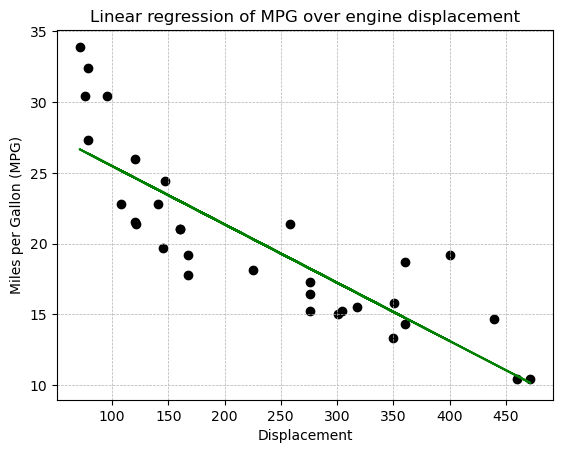

In [23]:
from turtle import color
import pandas as pd

# Load dataset from URL
df = pd.read_csv('https://gist.githubusercontent.com/seankross/a412dfbd88b3db70b74b/raw/5f23f993cd87c283ce766e7ac6b329ee7cc2e1d1/mtcars.csv')

# Display the dataframe
df

def lineare(x, a, b):
    return a * x + b

params, _ = sp.optimize.curve_fit(lineare, df['disp'], df['mpg'])
a, b = params

y = lineare(df['disp'], a, b)

plt.title('Linear regression of MPG over engine displacement')
plt.grid(linestyle = '--', linewidth = 0.5)
plt.scatter(df['disp'], df['mpg'], color='black')
plt.plot(df['disp'], y, color='green')
plt.xlabel('Displacement')
plt.ylabel('Miles per Gallon (MPG)')
plt.show()